#**Laboratorio 13: Clasificación por regresión logística**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

 **Nombres de los integrantes**


1.   Paola Andrea Campiño 202020785
2.   Isabella Contreras 202011871

**Grupo 5**


# **Introducción**

La regresión logística es una técnica matemática de análisis de datos que busca clasficarlos en dos etiquetas a través de una frontera de separación modelada como un plano. Dicho plano se puede escribir de la siguiente forma:

\begin{align*}
  w^Tx+b = 0
\end{align*}

Donde $w$ son los coeficientes del plano, $b$ el intercepto y $x$ las varaibles asociadas a las características de los datos, es decir: $x,w \in \mathbb{R}^n$ y $c \in \mathbb{R}$, luego, el objetivo de la regresión logística es encontrar los coeficientes $w$ y el intercepto $b$ tal que el plano separe los datos por etiquetas correctamente. La forma de hacerlo es mediante el proceso de entrenamiento con observaciones y sus respectivas etiquetas a través del aprendizaje supervisado.

# **Contexto del problema**

Uno de lo cánceres más comunes entre la población femenina es el cáncer de seno. Éste ocurre cuando las células normales mutan y se transforman en células cancerígenas. Esta transformación puede ser evaluada a través de procedimientos en los que se extraen muestras que se observan bajo el microscopio. Se ha mostrado que en etapas tempranas el núcleo de las células provenientes de los tumores cambia su morfología, permitiendo predecir el desarrollo del cáncer (Narasimha et al., 2013).

En el presente laboratorio se va a encontrar una recta para predecir si las células provenientes de un tumor están en proceso de mutación carcinogénica o no. Es decir, diseñaremos un modelo para clasificación, la cual es una tarea que hace parte del paradigma de aprendizaje supervisado en machine learning. El objetivo es encontrar una recta que parta el espacio en dos regiones: una asociada a las observaciones que son consideradas como malignas y otra región asociada a las observaciones que son concideradas como benignas.

Para entrenar el modelo usaremos una base de datos que consta de 469 muestras obtenidas de dos tipos de pacientes: aquellas que desarrollaron cáncer de seno y las que no. Clasificaremos dicha aparición a partir de dos características que se extraen las imágenes: el **radio promedio** y **índice de suavidad** (_smoothness index_) de los núcleos de las células. Esta última medida hace referencia a un índice de variación local del radio en un mismo núcleo, por lo que ante menor índice de suavidad, más redondo será el núcleo. Estas medidas se toman a partir de una imagen del tejido, como se muestra en la Figura 1.


<center> Figura 1. Muestras de núcleos celulares de biopsias de tumores de seno, los núcleos pequeños y redondos proceden de muestras no-cancerígenas (Narasimha et al., 2013). </center>

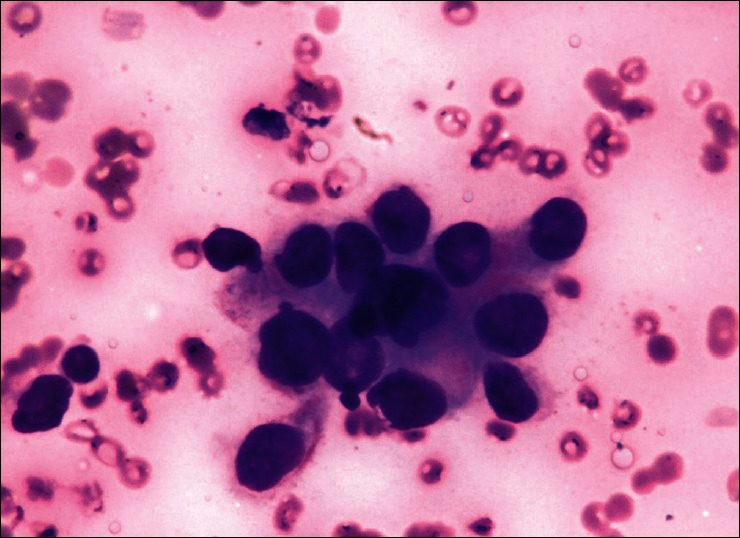

> Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. _International Journal of Applied and Basic Medical Research_, 3(1), 22.


1. Importe los datos del archivo *Breast_Cancer_Train.csv*. Este archivo corresponde a un dataframe con encabezados. El encabezado _"Pronostic"_ corresponde al pronóstico de las muestras:

- $1 =$ la muestra proviene de un tumor maligno.
- $0 =$ la muestra proviene de un tumor benigno.

Realice un **scatter plot** de dos dimensiones donde cada muestra es un punto y el color está asociado al diagnóstico. Elija colores distintos para cada diagnóstico, y analice la gráfica resultante.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Breast_Cancer_Train.csv')
data.head()

,radius_mean,smoothness_mean,pronostic
0,17.99,0.11840,1
1,20.57,0.08474,1
2,19.69,0.10960,1
3,11.42,0.14250,1
4,20.29,0.10030,1


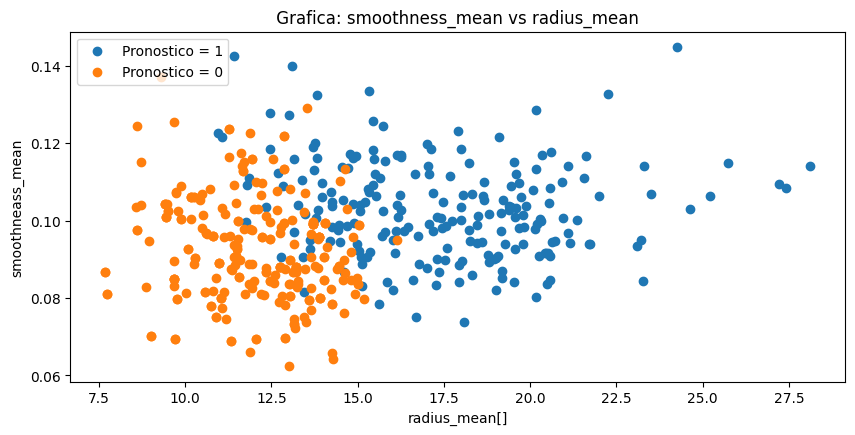

In [3]:
figure_1 = plt.figure(figsize=(10, 10))

ax_2 = figure_1.add_subplot(2,1,1)



cancer_df = data.query("pronostic == 1")
rand_cancer=cancer_df["radius_mean"]
smoo_cancer=cancer_df["smoothness_mean"]

cancerN_df = data.query("pronostic == 0")

rand_Ncancer=cancerN_df["radius_mean"]
smoo_Ncancer=cancerN_df["smoothness_mean"]


ax_2.scatter(rand_cancer,smoo_cancer, label="Pronostico = 1")
ax_2.scatter(rand_Ncancer,smoo_Ncancer, label="Pronostico = 0")

ax_2.set_title(" Grafica: smoothness_mean vs radius_mean ")
ax_2.set_ylabel('smoothneass_mean')
ax_2.set_xlabel('radius_mean[]')




ax_2.legend(loc = 'upper left')







2. Note que cada característica tiene un dominio diferente, donde el *smoothness* va desde $0.06$ hasta $0.14$, mientras que el *radius* va desde $7.5$ hasta $27.5$. Lo anterior afecta directamente en el modelo que construye el plano de separación, es decir, afecta los valores de $w$ y de $b$, por lo que puede tener prioridad una característica sobre otra. La forma de solucionar lo anterior es estandarizando los datos, lo cual se logra medinte la función `StandarScaler` de la librería `sklearn` de la siguiente forma:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Donde `X`  es un arreglo que contiene todas las observaciones para todas las características, es decir:


\begin{align*}
  X =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & ⋯ & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & ⋯ & x_n^{(2)} \\
    \vdots & \vdots & \ddots & \vdots\\
    x_1^{(m)} & x_2^{(m)} & ⋯ & x_n^{(m)}
  \end{bmatrix}
\end{align*}

Donde $x_i^{(j)}$ es la observación $j$ para la característica $i$.

Escriba una función que reciba el arreglo de observaciones $X$ y lo retorne con los datos estandarizados. Realice de nuevo el **scatter plot** anterior pero con los datos estandarizados.

In [4]:
from sklearn.preprocessing import StandardScaler


def standarize(x):
    m_x = []
    scaler = StandardScaler()
    x[['radius_mean','smoothness_mean']] = scaler.fit_transform(x[['radius_mean','smoothness_mean']])
    print(x)
    return x






In [5]:
st_data=standarize(data)

     radius_mean  smoothness_mean  pronostic
0       0.951323         1.525247          1
1       1.648728        -0.894590          1
2       1.410854         0.892610          1
3      -0.824628         3.257811          1
4       1.573041         0.224027          1
..           ...              ...        ...
464    -0.205613         0.142072          0
465    -1.200362        -1.151240          0
466     0.143090        -0.968638          0
467    -0.343472        -1.799693          0
468    -0.570534        -0.680356          0

[469 rows x 3 columns]


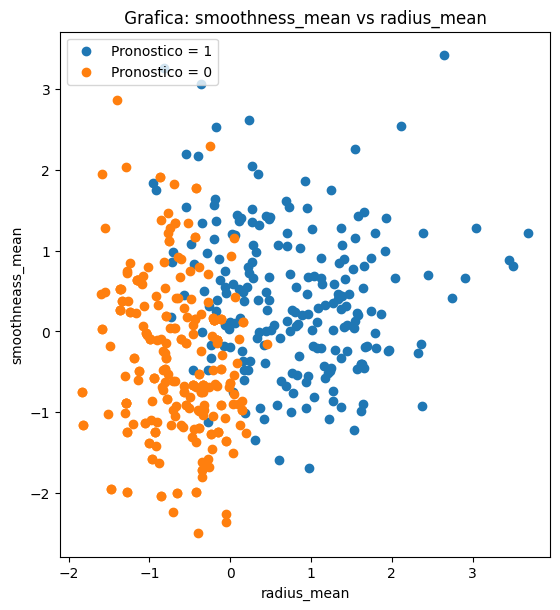

In [6]:
figure_1 = plt.figure(figsize=(15, 15))

ax_2 = figure_1.add_subplot(2,1,1)



cancer_df = st_data.query("pronostic == 1")
rand_cancer=cancer_df["radius_mean"]
smoo_cancer=cancer_df["smoothness_mean"]

cancerN_df = st_data.query("pronostic == 0")

rand_Ncancer=cancerN_df["radius_mean"]
smoo_Ncancer=cancerN_df["smoothness_mean"]


ax_2.scatter(rand_cancer,smoo_cancer, label="Pronostico = 1")
ax_2.scatter(rand_Ncancer,smoo_Ncancer, label="Pronostico = 0")

ax_2.set_title(" Grafica: smoothness_mean vs radius_mean ")
ax_2.set_ylabel('smoothneass_mean')
ax_2.set_xlabel('radius_mean')

ax_2.set_aspect('equal', adjustable='box')


ax_2.legend(loc = 'upper left')

3. Encuentre la recta que separa utilizando la función `LogisticRegression` de la librería `sklearn.linear_model`. Ajuste el modelo a los datos estandarizados con el método `.fit`. Esta función implementa el proceso que se llama 'regresión logística', el cual permite encontrar una recta (o plano) de la forma $w^Tx+b=0$ que separa los datos de dos clases diferentes. La forma de utilizarla es la siguiente:

```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
```

Donde `y` es el vector de etiquetas, es decir:


\begin{align*}
  y = \left[ y^{(1)}, y^{(2)}, ..., y^{(m)}\right]^T
\end{align*}

Donde $y^{(j)}$ es la etiqueta para la observación $x^{(j)}$. Luego, para obtener los coeficiente $w$ y el intercepto $b$ se usa el modelo creado así:

```
w = model.coef_.flatten()
b = model.intercept_

```

Para lo anterior, escriba una función que reciba los datos estandarizados y el vector de etiquetas y retorne el vector de coeficientes $w$ y el intercepto $b$.



In [7]:
from sklearn.linear_model import LogisticRegression

def recta (data, etiquetas):
    model = LogisticRegression()
    model.fit(data[['radius_mean','smoothness_mean']], etiquetas)
    w = model.coef_.flatten()
    b = model.intercept_
    return [w,b]


4. Realice de nuevo el **scatter plot** del punto 2 pero ahora incluya la recta de separación. Procure que esta no redimensione la figura del gráfico sino que tenga el mismo tamaño que antes.

In [8]:
w_b=recta(st_data,st_data['pronostic'])

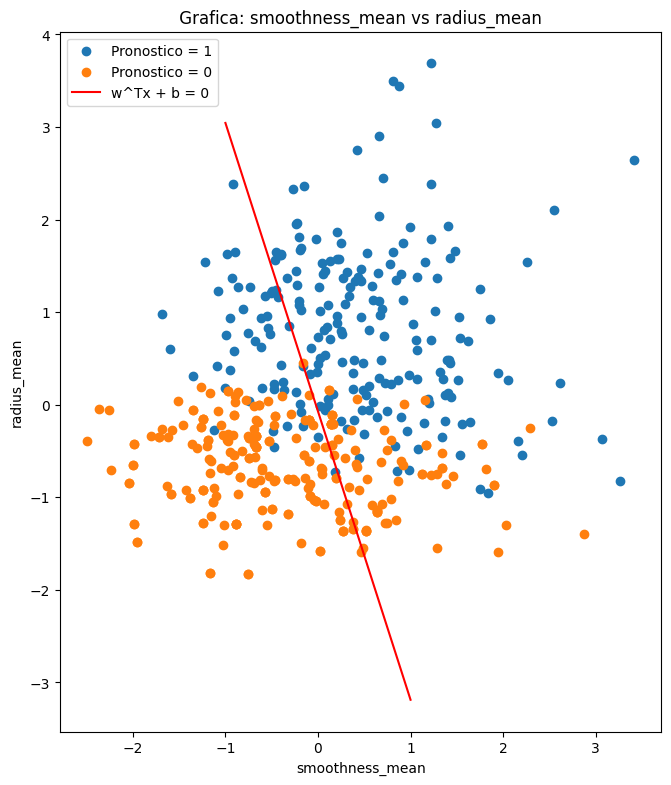

In [9]:
figure_2 = plt.figure(figsize=(20, 20))

ax_2 = figure_2.add_subplot(2,1,1)

def line_equation(x, w1= w_b[0][0], w2= w_b[0][1], b= w_b[1]):
    return (-w1 * x - b) / w2
x_values = np.linspace(-1, 1, 100)

cancer_df = st_data.query("pronostic == 1")
rand_cancer=cancer_df["radius_mean"]
smoo_cancer=cancer_df["smoothness_mean"]

cancerN_df = st_data.query("pronostic == 0")

rand_Ncancer=cancerN_df["radius_mean"]
smoo_Ncancer=cancerN_df["smoothness_mean"]


ax_2.scatter(smoo_cancer,rand_cancer, label="Pronostico = 1")
ax_2.scatter(smoo_Ncancer,rand_Ncancer, label="Pronostico = 0")

ax_2.set_title(" Grafica: smoothness_mean vs radius_mean ")
ax_2.set_xlabel('smoothness_mean')
ax_2.set_ylabel('radius_mean')

plt.plot(x_values, line_equation(x_values, w_b[0][0], w_b[0][1], w_b[1]), label='w^Tx + b = 0', c="r")


ax_2.set_aspect('equal', adjustable='box')
ax_2.legend(loc = 'upper left')

5. Una manera de verificar el funcionamiento del modelo es a través de alguna métrica (score). Una de ellas podría ser calculando el porcentaje de datos correctmente clasificados con respecto al total de datos. Note que, para una observación $x^{(j)}$, evaluada en la función de la recta de separación $w^Tx^{(j)}+b$, su valor resultante sería positivo o negativo si se encuentra de un lado de la frontera o del otro, dependiento del punto de vista del gráfico. En este sentido, escriba una función que reciba los coeficientes $w$, el intercepto $b$, el arreglo de observaciones $X$ y el vector de etiquetas $y$ y retorne el porcentaje de datos bien clasificados con respecto al total de datos.

In [10]:
def verify (data):
    x_values=data["radius_mean"]
    y_values=data["smoothness_mean"]

    pronos_val=data["pronostic"]
    resultados ={ "correctos": 0,"incorrectos": 0,"inline":0 }



    for i in range(0, len(x_values)):
        y_line=line_equation(x=x_values[i])
        dif = y_line-y_values[i]
        if ((dif <0 and pronos_val[i] ==0) or ( dif > 0 and pronos_val[i] ==1) ):
            resultados["incorrectos"]+=1
        elif  ((dif >0 and pronos_val[i] ==0) or ( dif < 0 and pronos_val[i] ==1) ):
            resultados["correctos"]+=1
        else:
            resultados["inline"]+=1
    for j in resultados:
      resultados[j]=resultados[j]/len(x_values)
    print(resultados)





verify(st_data)

{'correctos': 0.9253731343283582, 'incorrectos': 0.07462686567164178, 'inline': 0.0}


6. Hay que notar que, en este caso, la frontera entre los datos tenía un comportamiento aproximadamente lineal. Sin embargo, este no es siempre el caso. Para analizar esto, se utilizarán otros datos con un comportamiento diferente. Importe los datos *datos.txt* donde las dos primeras columnas corresponden a las observaciones y la tercera a las etiquetas. Luego, realice el mismo **scater plot** con estos nuevos datos.

In [11]:
data_2 = pd.read_csv('data.txt', sep= " ", header = None)
data_2.rename(columns={0:"radius_mean", 1:"smoothness_mean", 2:"pronostic"}, inplace=True)

data_2.head()

,radius_mean,smoothness_mean,pronostic
0,0.550649,0.337354,-1.0
1,0.120590,0.840109,-1.0
2,-0.004209,0.009832,-1.0
3,0.250346,0.489550,-1.0
4,-0.299583,-0.238759,-1.0


7. Use sus funciones anteriores para estandarizar y obtener los coeficientes $w$ y el inctercepto $b$ con estos nuevos datos. Luego, realice el mismo **scatter plot** pero ahora incluyendo la recta de separación resultante.

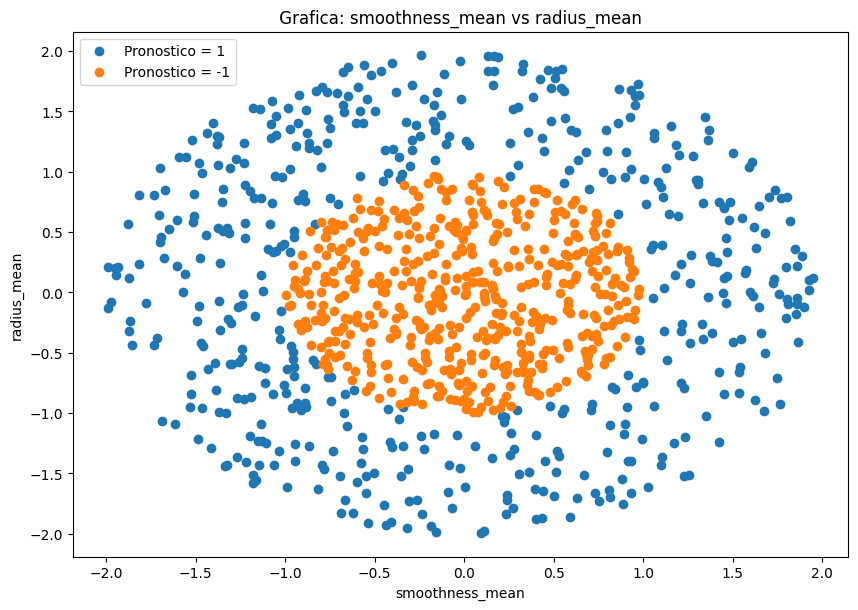

In [12]:
figure_3 = plt.figure(figsize=(10, 15))

ax_2 = figure_3.add_subplot(2,1,1)



cancer_df = data_2.query("pronostic == 1")
rand_cancer=cancer_df["radius_mean"]
smoo_cancer=cancer_df["smoothness_mean"]

cancerN_df = data_2.query("pronostic == -1")

rand_Ncancer=cancerN_df["radius_mean"]
smoo_Ncancer=cancerN_df["smoothness_mean"]


ax_2.scatter(smoo_cancer,rand_cancer, label="Pronostico = 1")
ax_2.scatter(smoo_Ncancer,rand_Ncancer, label="Pronostico = -1")

ax_2.set_title(" Grafica: smoothness_mean vs radius_mean ")
ax_2.set_xlabel('smoothness_mean')
ax_2.set_ylabel('radius_mean')




ax_2.legend(loc = 'upper left')

8. Use su función de score anterior para calcular el porcentaje de datos bien clasificados con respecto al total de datos.

     radius_mean  smoothness_mean  pronostic
0       0.617482         0.430215       -1.0
1       0.128303         1.013838       -1.0
2      -0.013652         0.050012       -1.0
3       0.275896         0.606892       -1.0
4      -0.349630        -0.238565       -1.0
..           ...              ...        ...
995    -1.704109         0.630842        1.0
996     0.893589         2.135302        1.0
997     0.916273        -1.711675        1.0
998     1.738944         0.390470        1.0
999     2.113633        -0.714786        1.0

[1000 rows x 3 columns]


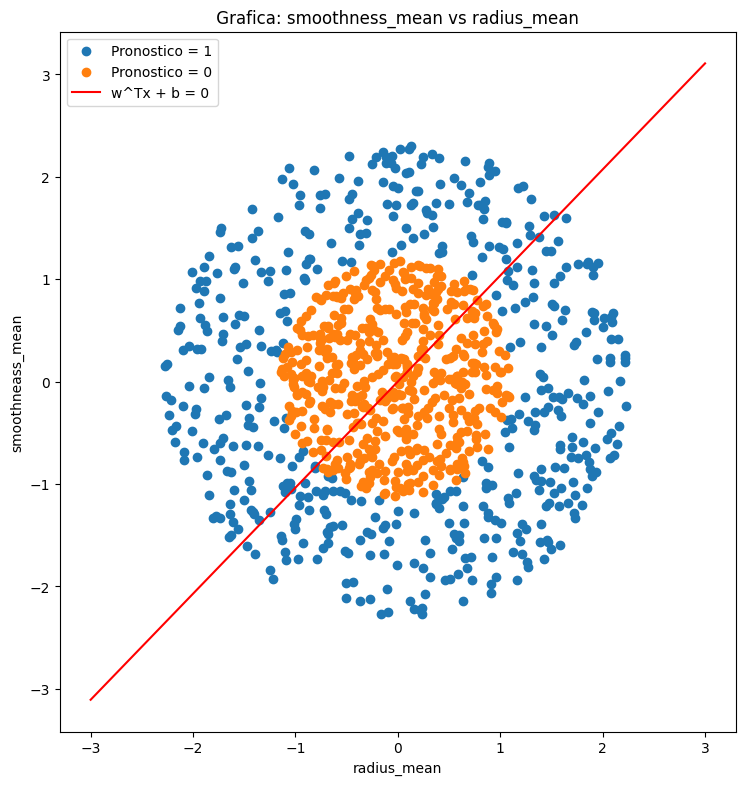

In [13]:
data_2_st=standarize(data_2)
w_b=recta(data_2_st,data_2_st['pronostic'])




figure_2 = plt.figure(figsize=(20, 20))

ax_2 = figure_2.add_subplot(2,1,1)

def line_equation(x, w1= w_b[0][0], w2= w_b[0][1], b= w_b[1]):
    return (-w1 * x - b) / w2
x_values = np.linspace(-3, 3, 100)

cancer_df = data_2_st.query("pronostic == 1")
rand_cancer=cancer_df["radius_mean"]
smoo_cancer=cancer_df["smoothness_mean"]

cancerN_df = data_2_st.query("pronostic == -1")

rand_Ncancer=cancerN_df["radius_mean"]
smoo_Ncancer=cancerN_df["smoothness_mean"]


ax_2.scatter(rand_cancer,smoo_cancer, label="Pronostico = 1")
ax_2.scatter(rand_Ncancer,smoo_Ncancer, label="Pronostico = 0")

ax_2.set_title(" Grafica: smoothness_mean vs radius_mean ")
ax_2.set_ylabel('smoothneass_mean')
ax_2.set_xlabel('radius_mean')

plt.plot(x_values, line_equation(x_values, w_b[0][0], w_b[0][1], w_b[1]), label='w^Tx + b = 0', c="r")


ax_2.set_aspect('equal', adjustable='box')
ax_2.legend(loc = 'upper left')







In [14]:
def verify (data):
    x_values=data["radius_mean"]
    y_values=data["smoothness_mean"]

    pronos_val=data["pronostic"]
    resultados ={ "correctos": 0,"incorrectos": 0,"inline":0 }



    for i in range(0, len(x_values)):
        y_line=line_equation(x=x_values[i])
        dif = y_line-y_values[i]
        if ((dif <0 and pronos_val[i] ==-1) or ( dif > 0 and pronos_val[i] ==1) ):
            resultados["incorrectos"]+=1
        elif  ((dif >0 and pronos_val[i] ==-1) or ( dif < 0 and pronos_val[i] ==1) ):
            resultados["correctos"]+=1
        else:
            resultados["inline"]+=1
    for j in resultados:
      resultados[j]=resultados[j]/len(x_values)
    print(resultados)


In [15]:
verify(data_2_st)

{'correctos': 0.465, 'incorrectos': 0.535, 'inline': 0.0}


9. 1Para realizar un análisis apropiado, responda las siguientes preguntas:

- Analice el gráfico de observaciones después de haber estandarizado los datos. También, revise la documentación de la función utilizada para estandarizar. ¿Cómo se estandarizan los datos?

Después de la estandarización de los datos, se puede apreciar en el gráfico de observaciones que la distribución de los datos se centra alrededor del origen, con valores que oscilan entre aproximadamente -3 y 3 después de la estandarización. Además, se nota una dispersión más amplia en el eje x (radius_mean) en comparación con el eje y (smoothness_mean). Esto sugiere que la característica radius_mean exhibe una mayor variabilidad en comparación con la característica smoothness_mean.
En términos de cómo funciona según sklearn, el StandardScaler lo que hace es remover el promedio y poner la escala en términos de la varianza[1]. De hecho, para hacer el cálculo se utiliza la siguiente ecuación:

\begin{align*}
z=\frac{x-u}{s}
\end{align*}

Donde:

- $u$ es el promedio de los datos de las columnas "radius_mean" y "smoothness_mean".
- $s$ es la desviación estándar de los datos de las columnas "radius_mean" y "smoothness_mean".
- $x$ es el valor de $x_i$ a estandarizar en las columnas mencionadas.

En este caso, se busca estandarizar los valores de las dos columnas, por lo que $u$ sería el promedio de los datos en las columnas "radius_mean" y "smoothness_mean". Lo mismo ocurre con la desviación estándar, que se calcula en $s$ para estas dos columnas.

- [1]: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


9.2: Teniendo el cuenta el gráfico donde se incluye la recta de separación para los datos de cancer, ¿por dónde se trazó la recta de separación?

La línea de separación fue trazada con el objetivo de maximizar la distancia entre los puntos de las dos categorías, es decir, aquellos con pronóstico 1 (maligno) y pronóstico 0 (benigno). En el gráfico, se representa como una línea roja que pasa cercana al centro de la agrupación de puntos. Esta línea exhibe una pendiente negativa y un intercepto positivo, dividiendo el espacio en dos regiones: la superior izquierda, donde se concentran la mayoría de los puntos con pronóstico 1, y la inferior derecha, donde se encuentran la mayoría de los puntos con pronóstico 0. La obtención de esta línea se llevó a cabo mediante el método de regresión logística, el cual busca determinar los coeficientes w y b que minimizan una función de pérdida basada en la probabilidad de que cada punto pertenezca a una clase u otra.

- Teniendo en cuenta el gráfico donde se incluye la recta de separación para los datos nuevos, ¿considera que el modelo de recta funciona para estos datos?, ¿qué modelo matemático podría funcionar para este caso?

Según el gráfico que presenta la línea de separación para los nuevos datos, parece que el modelo de regresión logística lineal no se ajusta bien a estos datos. Esto se debe a que los datos tienen una estructura circular, donde una clase está rodeada por la otra, y una línea recta no se acopla correctamente a la estructura.
Un modelo más apropiado para este caso podría ser la aplicación de un clasificador basado en máquinas de vectores de soporte (SVM) con un kernel radial (RBF). Este tipo de modelo tiene la capacidad de capturar la estructura circular de los datos al mapearlos a un espacio de mayor dimensión donde se vuelven linealmente separables. Después, en este espacio de mayor dimensión, se puede identificar un hiperplano que logra la separación entre las clases. Al regresar al espacio original, este hiperplano se traduce en una frontera de decisión no lineal, la cual puede adoptar una forma circular o elíptica, lo que parece ser más adecuado para representar la naturaleza de estos datos.

9.4: Recuerde la forma en el que usted logró identificar si un dato fue bien o mal clasificado. Teniendo en cuenta el modelo matemático propuesto en la pregunta anterior, ¿cómo podría saber si un dato fue bien o mal clasficiado?

Para evaluar la precisión de la clasificación de un dato, se emplea la función de predicción del modelo, la cual toma las características de una muestra como entrada y devuelve una etiqueta de clase anticipada. Luego, se compara esta etiqueta anticipada con la etiqueta real de la muestra para determinar si el dato ha sido correctamente clasificado. La coincidencia de ambas etiquetas indica una clasificación precisa, mientras que si no coinciden, el dato está mal clasificado.
En el contexto de un clasificador basado en máquinas de vectores de soporte (SVM) con un kernel radial (RBF), se aplica la función de predicción del modelo para obtener la etiqueta de clase anticipada, seguida de una comparación con la etiqueta de clase real.


En concreto para el nuevo modelo se podría establecer un centroide para el modelo, que tiene un radio que establece la frontera entre diagnosicos positivos (1) y diagnosticos negativos (-1/0). Se podría establecer que si la distancia (radio) al centroide  es menor a el radio frontera, se puede decir que el diagnostico debería de ser negativo (-1/0), en el caso en el que la distancia al centroide sea mayor al radio de la frontera es justo decir que el diagnostico es positivo (1).



Es importante destacar que en problemas de clasificación binaria como este, la función de predicción del modelo a menudo produce una probabilidad de pertenencia a la clase positiva. En consecuencia, se establece un umbral (por ejemplo, 0.5) para decidir la etiqueta de clase anticipada: si la probabilidad supera el umbral, la etiqueta de clase anticipada es la clase positiva, mientras que si es inferior, la etiqueta de clase anticipada es la clase negativa. Este umbral puede ajustarse para controlar la sensibilidad y especificidad del modelo.

